# Predicting heart disease at early stage

# 1. Introduction

This capstone project, as part of the data science career track program at Springboard, is aimed to develop a predictive model to detect the risk of heart disease at early stage using health parameters that are typical from routine monitoring. Data wrangling, and exploratory data analysis (EDA) were performed on heart disease dataset from UCI Machine Learning Repository. Supervised machine learning algorithms were trained on the training set with default settings, and there performances were evaluated and compared on the test set. The models with best performances were further tuned using grid search cross validation. Finally, a simple interactive dashboard was built to predict the risk of heart disease based on the best model. 

## 1.1. Problem identification and impact statement
***
Heart disease is the leading cause of death in the U.S. and worldwide, which produces immense health and economic burdens. In U.S., more than 600,000 people die from heart disease each year (i.e. 1 in every 4 deaths). The heart disease costs associated with heath care services, medicines, and lost productivity due to death is about $219 billion each year [(CDC 2020)](https://www.cdc.gov/heartdisease/). Studies have shown that about 1 in every 3 deaths related to heart diseases are preventable if early action is provided [(MMWR 2014)](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6317a1.htm). Therefore identifying those at increased risk for heart disease at earliest stage is critical to reduce the mortality associated with heart failure. While genomics, proteomics, and metabolomics have emerged as promising advanced tools to assess risk of disease mechanistically, predictive model based on traditional risk factors (e.g. heath measures typically evaluated in an annual physical) remains an important clinical tool that is rapid, cost-effective, and accurate [(Mosley 2020)](https://jamanetwork.com/journals/jama/article-abstract/2761086). 

**Given a set of health parameters from routine monitoring, can we robustly predict the risk of heart disease as early as possible?**


> <img align='center' width='200' height='150' src="hd-facts.jpg">


## 1.2. Dataset description

The original database contains 76 attributes, but all published studies refer to using a subset of 14 of them. This project used the Cleveland database downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). Below is a description of each of the 14 attributes: 


| No. | Variable name | Variable description | Data summary |
| --- | --- | --- | --- |
| 1 | age | age in years | continuous |
| 2 | sex | male or female | 0=female; 1=male |
| 3 | cp | chest pain type | 1=typical angina<br/> 2=atypical angina<br/> 3=non-anginal pain<br/> 4=asymptomatic |
| 4 | trestbps | resting blood pressure | continuous, in mmHg |
| 5 | chol | Serum cholesterol | continuous |
| 6 | fbs | fasting blood sugar | 0: <=120 mg/dL<br/> 1: >120 mg/dL |
| 7 | restecg | resting electrocardiographic results | 0=normal<br/> 1=having ST-T wave abnormal<br/> 2=left ventricular hypertrophy |
| 8 | thalach | maximum heart rate achieved | continuous |
| 9 | exang | exercise induced angina | 0=no; 1=yes |
| 10 | oldpeak | ST depression induced by exercise relative to rest | continuous |
| 11 | slope | the slope of the peak exercise ST segment  | 1=upsloping<br/> 2=flat<br/> 3=downsloping |
| 12 | ca | number of major vessels colored by flouroscopy | integer, 0-3 |
| 13 | thal | a bood disorder called thalassemia | 3=normal<br/> 6=fixed defect<br/> 7=reversable defect |
| 14 | target | diagnosis of heart disease | 0=no; 1=yes |

## 1.3. Methdology 
The original data downloaded from UCI Machine Learning Repository was loaded in the python jupyter notebook. The column names was appropriately defined. In addition, we cleaned the raw data by filling missing values, and removing duplicated entries. Furthur, we examined the data types, counts of unique values, transformed the target values into a binary format, and export the clean data. 

To better understand the data, summary statistics were generated. In addition, the data was visualized via histograms, barplots, boxplots, and a heatmap of correlation matrix. 

The cleaned data were appropriately pre-processed for modeling. This included creation of dummy features for categorical variables, splitting the dataset into training and test set, and standardizing the magnitude of numeric features. 

Binary classification models were trained on the training set using default settings. The model performance were evaluated using the test set. Models with high performance were selected for hyperparameter tuning via grid search. The 'recall' score was used for optimization, in order to minimize false negatives during prediction of heart disease. The model with higest recall score as well as high accuracy and roc-auc score was selected as the final model to make future predictions.  

Interactive data visualizations are created using plotly and dash. 

# 2. Data wrangling
***
* Load data, and define column names
* Data cleaning: missing values, duplicates etc.
* Export cleaned data into 'data' folder

In [1]:
#load basic libraries
import os
import numpy as np 
import pandas as pd 
import pandas_profiling 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
cwd = os.getcwd()
print('The current working directory is %s' %cwd)

for subfolder in ['data','models','figures']:
    newdir = os.path.join(cwd,subfolder)
    if not os.path.exists(newdir):
        os.makedirs(newdir)
    
# os.listdir()

The current working directory is /Users/hhl/Desktop/Springboard062020/Springboard/Capstone2


## 2.1. Load data, and define column names

In [3]:
df = pd.read_csv('processed.cleveland.data',header=None)
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## 2.2. Check missing values

In [6]:
df.isnull().sum().sort_values(ascending=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#ca, thal appear to be 'object', so check the unique value and value counts for them
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [8]:
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [9]:
# replace the '?' with np.nan
df.replace('?',np.nan,inplace=True)

In [10]:
#fill na with mode
df[['ca','thal']] = df[['ca','thal']].fillna(df[['ca','thal']].mode().iloc[0])

In [11]:
df.ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [12]:
df.thal.value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

## 2.3. Check duplicates

In [13]:
#check duplicated entries
df[df.duplicated()]  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 2.4. Convert the response varabile to binary

In [15]:
#map the 'target' values as below to make it as binary.
df['target'] = df.target.map({0:0,
                             1:1,
                             2:1,
                             3:1,
                             4:1})

In [16]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

## 2.5. Examine unique values 

In [17]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

## 2.6. Explore value counts 

In [18]:
df.target.value_counts() ##relatively balanced

0    164
1    139
Name: target, dtype: int64

In [19]:
df.sex.value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [20]:
df.to_csv('data/heart_clean.csv',index=False)

# 3. Exploratory data analysis (EDA)
***
 * Summary statistics
 * Distributions: histograms for numerical varialbes, barplots for categorical varaibles
 * Outliers/Extreme values: boxplots
 * Relationships between variables: heatmap of correlation matrix
 * pandas_profiling.ProfileReport()

In [21]:
df = pd.read_csv('data/heart_clean.csv')

## 3.1. Summary statistics

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## 3.2. Histograms for numerical variables

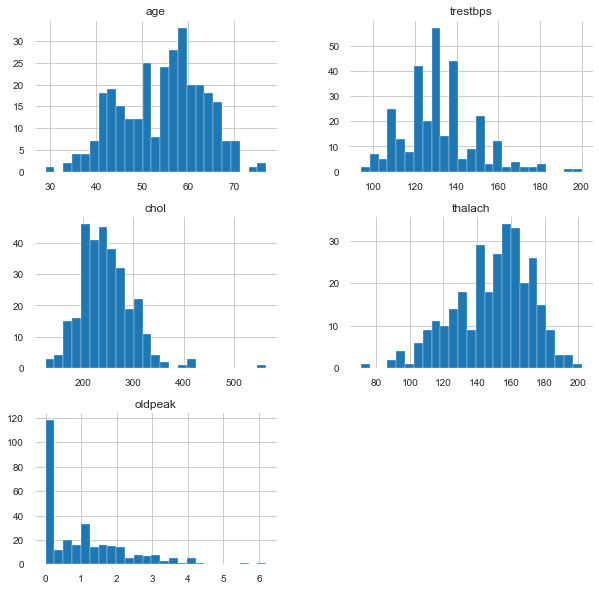

In [23]:
_=df[['age','trestbps','chol','thalach','oldpeak']].hist(bins=25,figsize=(10,10))

## 3.3. Barplots for categorical variables

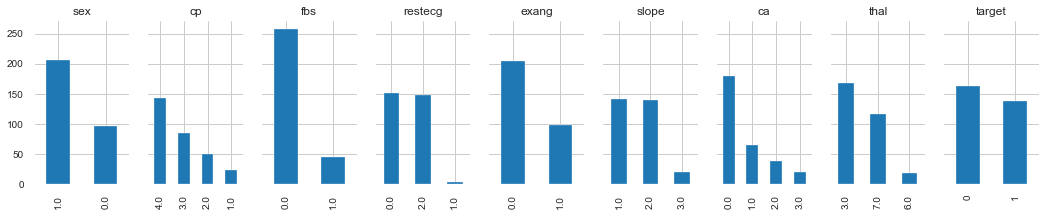

In [24]:
cat = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
fig,axs = plt.subplots(1,9,figsize=(18,3),sharey=True)
for i,cat in enumerate(df[cat]):
    df[cat].value_counts().plot(kind='bar',ax=axs[i]).set_title(cat)

## 3.4. Boxplots for numerical varialbes - visualizing outliers/extreme values

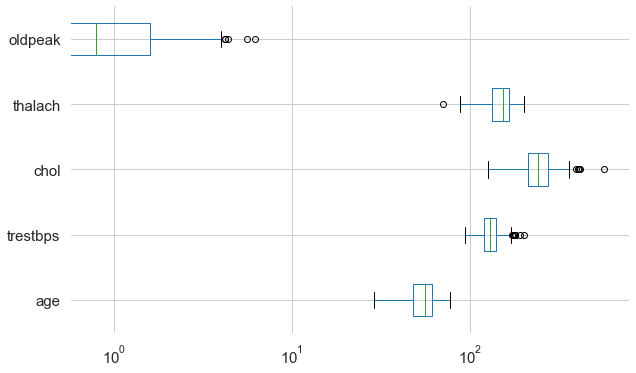

In [25]:
_=df[['age','trestbps','chol','thalach','oldpeak']].boxplot(grid=True,rot=0,figsize=(10,6),fontsize=15,vert=False)
plt.xscale('log')

## 3.5. Heatmap of correlation matrix

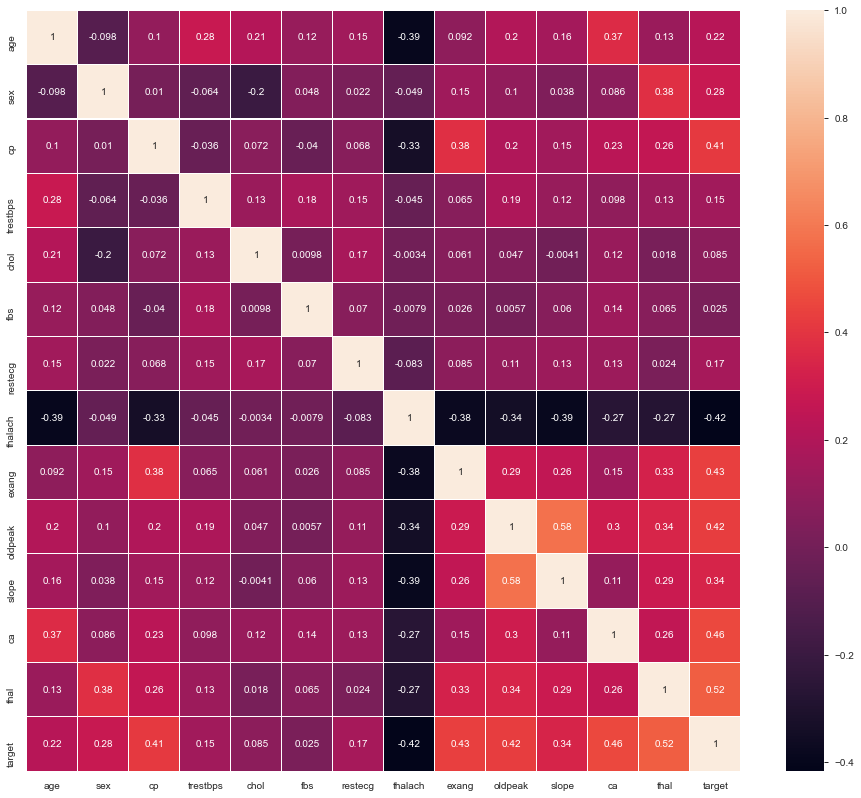

In [26]:
corr = df.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(16,14))
_=sns.heatmap(corr,linewidths=.1, annot=True)

In [27]:
# profile = pandas_profiling.ProfileReport(df, title='Pandas profile report - heart attack dataset', minimal=False)
# profile.to_file(output_file='data/EDAreport.html')

# 4. Pre-processing and training data preparation
***
* Create dummy features for categorical variables
* Split into training and test set
* Standardize the magnitude of numeric features

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 4.1. Create dummy features for categorical variables

In [29]:
#sex, cp (chest pain type), restecg (resting electrocardiographic results), exang (exercise induced angina), slope (the slope of the peak exercise ST segment), and thal (blood disorder type) are categorical variables
#fbs is boolean; ca (number of major vessels) is ordinal
df2 = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','thal'], drop_first=True)
df2.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0.0,0,1,0,0,0,1,0,1,0,0,1,1,0
1,67.0,160.0,286.0,108.0,1.5,3.0,1,1,0,0,1,0,0,1,1,1,0,0,0
2,67.0,120.0,229.0,129.0,2.6,2.0,1,1,0,0,1,0,0,1,1,1,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0.0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0


## 4.2. Split data into training and test set

In [30]:
#train-test split -- keep the ratio of classes in the original dataset (stratify).
y = df2.target
X = df2.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, stratify=y, random_state=52)
#check whether the data is equally splitted or not 
print(y_train.value_counts())
print(y_test.value_counts())

0    123
1    104
Name: target, dtype: int64
0    41
1    35
Name: target, dtype: int64


## 4.3. Standardization 

In [31]:
#build scaler based on training set and apply it to test set
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 5. Modeling
***

## 5.1. An overview of binary classifiers

* Naive Bayes
  * Simple, fast, low computation cost, and accurate 
  * Cannot learn interactions btw features(i.e. assume independence of predictors) <br/><br/>

* Logistic Regression
  * lots of ways to regularize the model (e.g. lasso, ridge), and don't have to worry as much about features being correlated, like in Naive Bayes
  * have a nice probabilistic interpretation - use it if you want a probabilistic framework (_to easily adjust classification thresholds_) or if you expect to receive more training data in the future that you want to quickly incorporate into your model 
  * a linear classifier, assume some sort of linear relationship btw the data <br/><br/>
       
* K-Nearest Neighbors
  * No assumptions about data; simple and intuitive, relatively high accuracy, easy to implement for multi-class problem, can be used for both classification and regression problems
  * Curse of dimensionality, does not perform well on imbalanced data, sensitive to outliers, distance based, slow as dataset grows <br/><br/>

* Support Vector Machines (SVMs, linear, nonlinear)
  * high accuracy, especially popular in text classification problems where very high-dimensional spaces are the norm
  * works poorly with overlapping classes and is also sensitive to the type of kernel used <br/><br/>

* Decision tree 
      
* Ensemble methods: Random Forests
   * easy to interpret and explain
   * can handle feature interctions, non-parametric (don't have to worry about outliers or whether the data is linearly separable)
   * fast and scalable
   * don't support online learning - have to rebuild trees when new examples come on <br/><br/>
* Ensemble methods: AdaBoost

* Ensemble methods: Gradient Boosting or gradient boosting machines GBM
    * GradientBoostingClassifier with Scikit-Learn 
    * XGBoost - extreme gradient boosting: computational efficiency and often better model performance
    * LightGBM - light gradient boosted machine: 
           * high speed, high accuracy, can use categorical features as input directly - no need to convert to one-hot coding
           * sensitive to overfitting and can easily overfit small data (10,000+ observations suggested)    
    * CatBoost - category gradient boosting: in addition to computational speed improvements, the primary benefit of the CatBoost is support for categorical input variables


## 5.2. Build models with default settings

In [32]:
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score, matthews_corrcoef,roc_curve, precision_recall_curve, auc
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import time

In [33]:
# define a function to calculate and store metrics
def model_eval(model,name,X_test,y_test,y_pred):
    pfm = {'model':name}
    pfm['times'] = round(time.time()-start_time,4)
    precision,recall,fscore,support = score(y_test, y_pred, pos_label=1, average='binary')
    pfm['precision'] = round(precision,3)
    pfm['recall'] = round(recall,3)
    pfm['accuracy'] = round(accuracy_score(y_test,y_pred),3)
    pfm['mcc'] = round(matthews_corrcoef(y_test,y_pred),3)
    y_prob = model.predict_proba(X_test)[:,1] # output positive class prediction probabilities
    fpr,tpr,threshold = roc_curve(y_test,y_prob)
    pfm['roc_auc'] = round(auc(fpr,tpr),3)
    print('--- %s seconds ---' % pfm['times'])
    print('Precision:{precision} / Recall:{recall} / Accuracy:{accuracy} / MCC:{mcc} / ROC_AUC:{roc_auc}'.format(**pfm))
    return pfm

### 5.2.1. Naive Bayes classifier

In [34]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

start_time = time.time()

# Instantiate a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training set
gnb.fit(X_train,y_train)

# Predict output
y_pred = gnb.predict(X_test)

gnb_pfm = model_eval(gnb,'GaussianNaiveBayes',X_test,y_test,y_pred)

--- 0.0032 seconds ---
Precision:0.725 / Recall:0.829 / Accuracy:0.776 / MCC:0.559 / ROC_AUC:0.843


### 5.2.2. Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

lr = LogisticRegression(random_state=52)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

lr_pfm = model_eval(lr,'LogisticRegression',X_test_scaled,y_test,y_pred)

--- 0.0044 seconds ---
Precision:0.811 / Recall:0.857 / Accuracy:0.842 / MCC:0.685 / ROC_AUC:0.884


### 5.2.3. K-nearest neighbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)

knn_pfm = model_eval(knn,'kNN',X_test_scaled,y_test,y_pred)

--- 0.0033 seconds ---
Precision:0.737 / Recall:0.8 / Accuracy:0.776 / MCC:0.554 / ROC_AUC:0.831


### 5.2.4. Support vector machine 

In [37]:
from sklearn.svm import SVC

start_time = time.time()

svm = SVC(probability=True,random_state=52)
svm.fit(X_train_scaled,y_train)
y_pred = svm.predict(X_test_scaled)

svm_pfm = model_eval(svm,'SVM',X_test_scaled,y_test,y_pred)

--- 0.007 seconds ---
Precision:0.788 / Recall:0.743 / Accuracy:0.789 / MCC:0.575 / ROC_AUC:0.858


### 5.2.5. Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()

dt = DecisionTreeClassifier(random_state=52)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

dt_pfm = model_eval(dt,'DecisionTree',X_test,y_test,y_pred)

--- 0.0039 seconds ---
Precision:0.757 / Recall:0.8 / Accuracy:0.789 / MCC:0.579 / ROC_AUC:0.79


### 5.2.6. Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

rf = RandomForestClassifier(random_state=52)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

rf_pfm = model_eval(rf,'RandomForest',X_test,y_test,y_pred)

--- 0.1144 seconds ---
Precision:0.848 / Recall:0.8 / Accuracy:0.842 / MCC:0.682 / ROC_AUC:0.892


### 5.2.7. AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()

ada = AdaBoostClassifier(random_state=52)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

ada_pfm = model_eval(ada,'AdaBoost',X_test,y_test,y_pred)

--- 0.0639 seconds ---
Precision:0.765 / Recall:0.743 / Accuracy:0.776 / MCC:0.549 / ROC_AUC:0.862


### 5.2.8. Gradient boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()

gb = GradientBoostingClassifier(random_state=52)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

gb_pfm = model_eval(gb,'GradientBoosting',X_test,y_test,y_pred)

--- 0.0644 seconds ---
Precision:0.794 / Recall:0.771 / Accuracy:0.803 / MCC:0.602 / ROC_AUC:0.872


### 5.2.9. XGBoost

In [42]:
from xgboost import XGBClassifier

start_time = time.time()

xgb = XGBClassifier(random_state=52)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

xgb_pfm = model_eval(xgb,'XGBoost',X_test,y_test,y_pred)

--- 0.0774 seconds ---
Precision:0.818 / Recall:0.771 / Accuracy:0.816 / MCC:0.629 / ROC_AUC:0.877


### 5.2.10. LightGBM

In [56]:
import lightgbm as lgb

start_time = time.time()

lgb = lgb.LGBMClassifier(objective='binary',random_state=52)
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

lgb_pfm = model_eval(lgb,'LightGBM',X_test,y_test,y_pred)

--- 0.0565 seconds ---
Precision:0.765 / Recall:0.743 / Accuracy:0.776 / MCC:0.549 / ROC_AUC:0.845


## 5.3. Model evaluation

In [44]:
df = [gnb_pfm,
       lr_pfm,
       knn_pfm,
       svm_pfm,
       dt_pfm,
       rf_pfm,
       ada_pfm,
       gb_pfm,
       xgb_pfm,
       lgb_pfm]

cols = ['model', 'precision', 'recall', 'accuracy', 'mcc', 'roc_auc', 'times']
df = pd.DataFrame(df)[cols]
display(df)

,model,precision,recall,accuracy,mcc,roc_auc,times
0,GaussianNaiveBayes,0.725,0.829,0.776,0.559,0.843,0.0032
1,LogisticRegression,0.811,0.857,0.842,0.685,0.884,0.0044
2,kNN,0.737,0.800,0.776,0.554,0.831,0.0033
3,SVM,0.788,0.743,0.789,0.575,0.858,0.0070
4,DecisionTree,0.757,0.800,0.789,0.579,0.790,0.0039
5,RandomForest,0.848,0.800,0.842,0.682,0.892,0.1144
6,AdaBoost,0.765,0.743,0.776,0.549,0.862,0.0639
7,GradientBoosting,0.794,0.771,0.803,0.602,0.872,0.0644
8,XGBoost,0.818,0.771,0.816,0.629,0.877,0.0774
9,LightGBM,0.765,0.743,0.776,0.549,0.845,0.0575


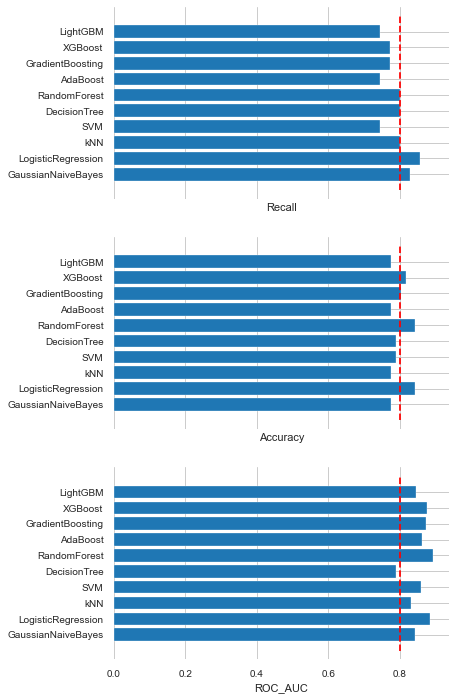

In [45]:
##### Barplots comparing accuracy,roc_auc,and recall scores across all models
fig,axs=plt.subplots(3,1,figsize=(6,12),sharex=True)

axs[0].barh('model','recall',data=df)
axs[1].barh('model','accuracy',data=df)
axs[2].barh('model','roc_auc',data=df)

axs[0].set_xlabel('Recall')
axs[1].set_xlabel('Accuracy')
axs[2].set_xlabel('ROC_AUC')
axs[0].plot([0.8,0.8],[-1,10],'r--')
axs[1].plot([0.80,0.8],[-1,10],'r--')
axs[2].plot([0.80,0.80],[-1,10],'r--')
plt.show()

## 5.4. Model optimization: hyperparameter tuning 

Hyperparameter tuning via grid search cross validation to maximize recall score (minimize false negatives)

In [46]:
#Logistic regression with grid search

start_time = time.time()

lr2 = LogisticRegression(random_state=52, max_iter=1000)

param_grid = {'penalty':['l1','l2'],
              'C':[0.1,1.0,1.5,2,2.5,3,4,5,10],
             'solver':['liblinear']}  #results no better than the base model [C=1,penalty='l2','solver'='lbfgs']
    
grid_lr = GridSearchCV(lr2, param_grid = param_grid, cv=StratifiedKFold(n_splits=5), scoring='recall',refit=True)
grid_lr.fit(X_train_scaled,y_train)
y_pred = grid_lr.predict(X_test_scaled)

grid_lr_pfm = model_eval(grid_lr,'LogisticRegression_tuned',X_test_scaled,y_test,y_pred)
print(grid_lr.best_params_)

--- 0.2858 seconds ---
Precision:0.806 / Recall:0.829 / Accuracy:0.829 / MCC:0.657 / ROC_AUC:0.884
{'C': 2, 'penalty': 'l2', 'solver': 'liblinear'}


In [47]:
#Ramdom forest with grid search
start_time = time.time()

rf2 = RandomForestClassifier(random_state=52)

param_grid = {'n_estimators':[50,100,200],
                'max_depth':[5,10,15,None],
                'max_features':['sqrt'],
                'min_samples_split':[3,5],
                'min_impurity_decrease':[0],
                 'bootstrap':[True]
                }
    
grid_rf = GridSearchCV(rf2, param_grid = param_grid, cv=StratifiedKFold(n_splits=5), scoring='recall')
grid_rf.fit(X_train,y_train)
y_pred = grid_rf.predict(X_test)

grid_rf_pfm = model_eval(grid_rf,'RandomForest_tuned',X_test,y_test,y_pred)
print('Tuned hyperparameters:',grid_rf.best_params_)

--- 15.3817 seconds ---
Precision:0.853 / Recall:0.829 / Accuracy:0.855 / MCC:0.708 / ROC_AUC:0.886
Tuned hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_impurity_decrease': 0, 'min_samples_split': 3, 'n_estimators': 100}


In [48]:
#Comparing model performance with and without hyperparameter tuning
c_pfm = [lr_pfm, grid_lr_pfm,
      rf_pfm, grid_rf_pfm]

cols = ['model', 'precision', 'recall', 'accuracy', 'mcc', 'roc_auc', 'times']
c_pfm = pd.DataFrame(c_pfm)[cols]
display(c_pfm)

,model,precision,recall,accuracy,mcc,roc_auc,times
0,LogisticRegression,0.811,0.857,0.842,0.685,0.884,0.0044
1,LogisticRegression_tuned,0.806,0.829,0.829,0.657,0.884,0.2858
2,RandomForest,0.848,0.800,0.842,0.682,0.892,0.1144
3,RandomForest_tuned,0.853,0.829,0.855,0.708,0.886,15.3817


## 5.5. Final model

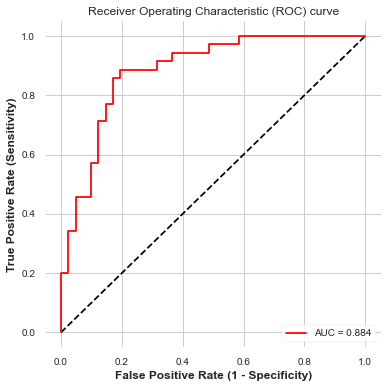

In [49]:
#roc curve of lr model
lr_fpr,lr_tpr,threshold = roc_curve(y_test,lr.predict_proba(X_test_scaled)[:,1])
roc_auc_ = auc(lr_fpr,lr_tpr)
plt.figure(figsize=(6,6))
_=plt.plot([0,1],[0,1],'k--')
_=plt.plot(lr_fpr,lr_tpr,'r',label='AUC = %.3f'%roc_auc_)
_=plt.title('Receiver Operating Characteristic (ROC) curve')
_=plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=12,fontweight='bold')
_=plt.ylabel('True Positive Rate (Sensitivity)',fontsize=12,fontweight='bold')
_=plt.legend(loc='lower right')

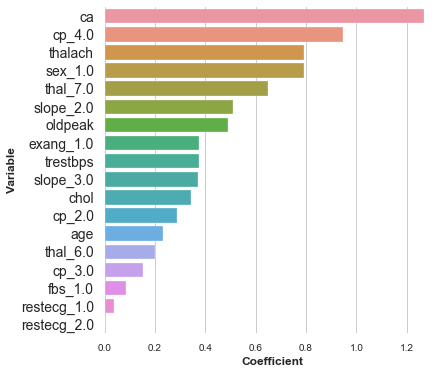

In [50]:
# output feature importance from the best model -- logistic regression with highest recall
coef = abs(lr.coef_[0])
dat = pd.DataFrame(sorted(zip(coef, X_train.columns),reverse=True),columns=['Coefficient','Variable'])

plt.figure(figsize=(6,6))      
g=sns.barplot('Coefficient','Variable',data=dat)
g.set_xlabel('Coefficient',fontsize=12,weight='bold')
g.set_ylabel('Variable',size=12,weight='bold')
g.set_yticklabels(g.get_yticklabels(),size=14)
plt.show()

# 6. Conclusions 

*Heart disease is the leading cause of death in the US and worldwide, which produces immense health and economic burdens. Identifying those at increased risk for heart disease at earliest stage is critical to reduce the mortality associated with heart failure. While advanced 'omics' technologies have emerged as promising ways of understanding risk of disease mechanistically, predictive model based on traditional risk factors remains an important clinical tool that is rapid, cost-effective, and can be as accurate as molecular methods.*

A comparison of 10 binary classification algorithms suggested that logistic regression and random forest were among the models with top performance. Subsequent hyperparameter tuning via grid search furthur increased the performance of random forest, however, it did not improve the performance of logistic regression. Although ramdom forest with grid search hyperparamter tuning gives the highest accuracy (i.e. 0.855 ), logistic regression with default settings (i.e. C=1.0, penalty='l2', solver='lbfgs') was selected as the final model for prediction of heart disease risks. This is because logistic regression, although gives slightly lower accuracy score (i.e. 0.842) compared to random forest grid search, it gives the highest recall score (i.e. 0.857). A higher recall score means lower false negatives, which is important in the prediction of heart disease. In addition, compared to random forest, logistic regression is substantially faster, and it is easier to incorporte more training data once they become available. 

In future, it would be worthwhile to to additional feature engineering provided with more domain knowledge and data. Developing a user-friendly interactive dashboard tool is equally important.  

In [55]:
#print(grid_rf_pfm['accuracy'],grid_rf_pfm['recall'],lr_pfm['recall'],lr_pfm['accuracy'])

# Acknowledgements 
This work is not possible without the database provided by the UCI Machine Learning repository. I would like to thank Dipanjan Sarkar, Kenneth Gil-Pasquel, and the Springboard team who provided inputs and guidance during this project. 

## Work in Progress
*Developing an interactive dashboard -- Heart disease risk calculator*<br><br>
*This work is in progress. Your feedback would be greatly appreciated.<br><br>

**Thank you for reading!**<br><br>


In [52]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc #create interactive dash graphs
import dash_html_components as html #structure and design the layout of the page
from dash.dependencies import Input, Output, State
#the input will be the information entered by the user in the dashboard;
#the output will be the graph placeholder where we plot the data
import plotly.graph_objects as go #build graphs

In [53]:
# Load Data
df = pd.read_csv('data/test_data.csv')

# make predictions
df2 = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','thal'], drop_first=True)
test = scaler.transform(df2)
risk = lr.predict_proba(test)[:,1]
threshold = 0.5
data = {'PatientID':df.index,
       'risk_prob':risk,
       'target':risk>threshold}
riskdf = pd.DataFrame(data)

In [54]:
#create a plotly figure
trace1 = go.Scatter(x=data['PatientID'],y=data['risk_prob'],mode='markers',
                   marker=dict(size=12,
                              color=riskdf.target.astype('int'), colorscale=[[0,'green'],[1,'red']]))

layout = go.Layout(title = 'Predicting Heart Disease Risk',
                   xaxis_title='Patient ID',
                   yaxis_title='Probability of Heart Disease',
                   hovermode='closest')
fig = go.Figure(data = [trace1],layout = layout)

fig.add_shape(
    dict(type='line',
        x0=0,y0=0.5,
        x1=len(riskdf.PatientID),y1=0.5,
        line=dict(color='red', width=2, dash='dashdot')
        ))
fig.update_shapes(dict(xref='x', yref='y'))

fig.update_traces(selector=dict(mode='markers'),
                  hovertext=data['PatientID'],
                  hoverlabel=dict(namelength=0),
                  hovertemplate='PatientID: %{x}<br>Risk: %{y}')
                   
fig.update_layout(template='plotly_white',
                 font = dict(family='Verdana',size=16,color='black'))

fig.update_xaxes(showline=True,
                 linewidth=2,
                 linecolor='black',
                 mirror=True,
                 showgrid=True)

# Build App
app = JupyterDash(__name__)
colors = {
    "graphBackground": "#F5F5F5",
    "background": "#ffffff",
    "text": "#000000"
}
app.layout = html.Div([
    dcc.Upload(id='upload-data',
        children=html.Div([
        'Drag and Drop or ',
        html.A('Select Files')
    ]),
    style={
        'width': '100%',
        'height': '60px',
        'lineHeight': '60px',
        'borderWidth': '1px',
        'borderStyle': 'dashed',
        'borderRadius': '5px',
        'textAlign': 'center',
        'margin': '10px'},
    multiple=True),
    dcc.Graph(id='graph',figure=fig)
])

## Define callback to update graph

# Run app and display result inline in the notebook
if __name__ == '__main__':
    app.run_server(mode='inline')